<a href="https://colab.research.google.com/github/Rogercas1/DS201Final/blob/main/Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv = "heart.csv"
df = pd.read_csv(csv)

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Pie Charts

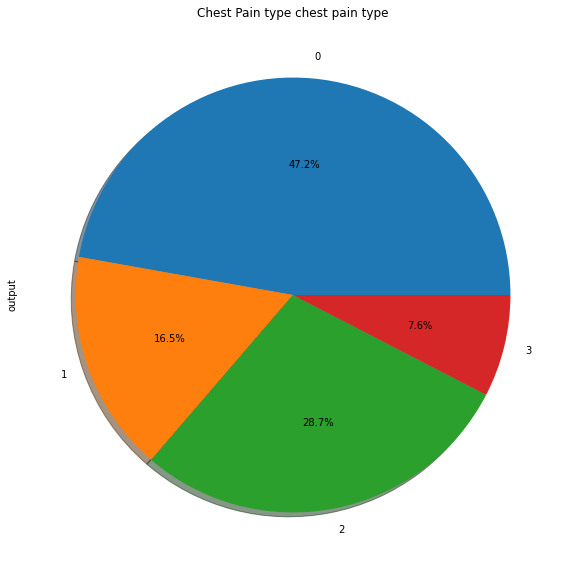

In [4]:
df.groupby('cp')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Chest Pain type chest pain type")

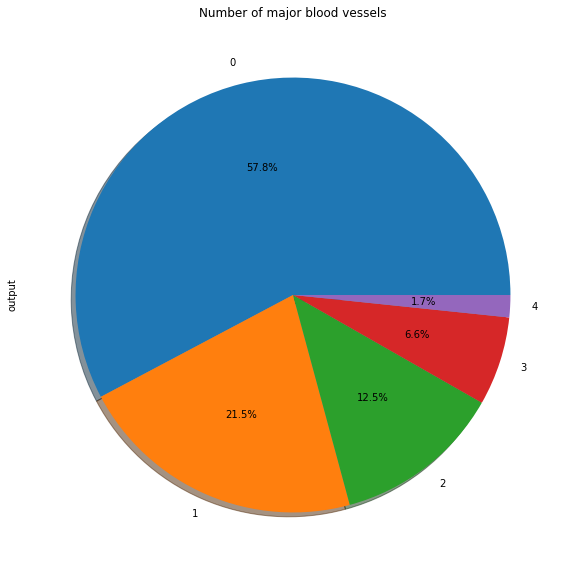

In [5]:
df.groupby('caa')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Number of major blood vessels")

- Typical Angina (Value 0): Chest pain caused by reduced blood flow
- Atypical Angina (Value 1): Chest pain not caused by Typical Angina factors
- Non-anginal Pain  (Value 2): Chest pain not caused from heart attack or from the heart
- Asymptomatic (Value 3): Silent Hard Attack  

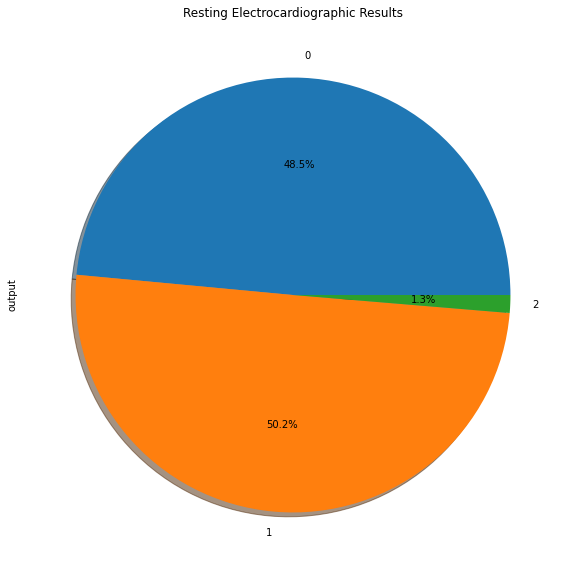

In [6]:
df.groupby('restecg')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Resting Electrocardiographic Results")

Electromagnetic Results
- Normal (Value 0)
- ST-T Wave abnormality (Value 0): known to independently predict subsequent morbidity and mortality from cardiovascular diseases
- Left Ventricular Hypertrophy (Value 2); Thickening of the wall of the heart's main pumping chamber. This thickening may result in elevation of pressure within the heart and sometimes poor pumping action. 

Assumptions: 
- We are going to assume atypical angina pain will have the highest count and correlation to heart attacks.
- We also believe left ventricular hyptertrophy will be the greater ecg indicator of a heart attack

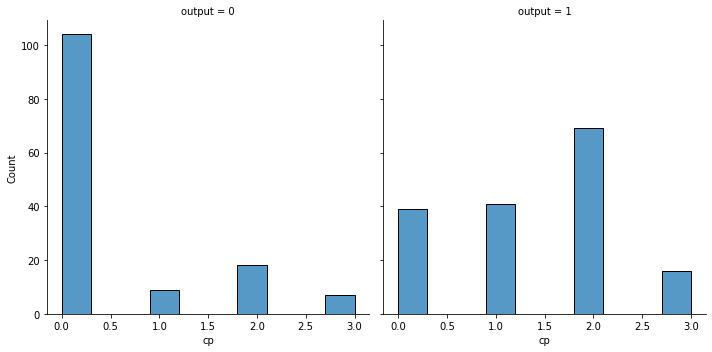

In [7]:
sns.displot(x=df['cp'], col=df['output'])

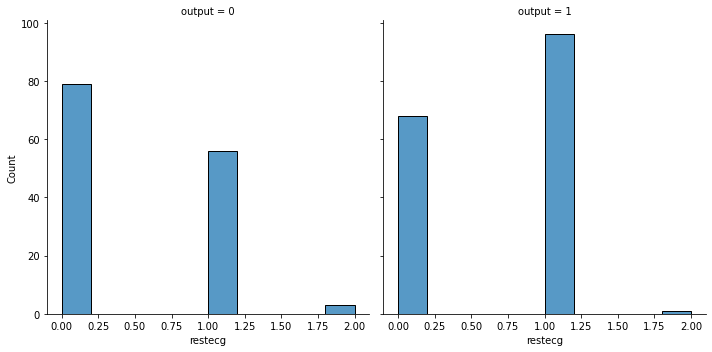

In [8]:
sns.displot(x=df['restecg'], col=df['output'])

- We see that non-anginal chest pain has the higher count of high chance of heart attacks.
- We also see that have a ST-T wave abnormality has higher count of high chance of heart attacks.

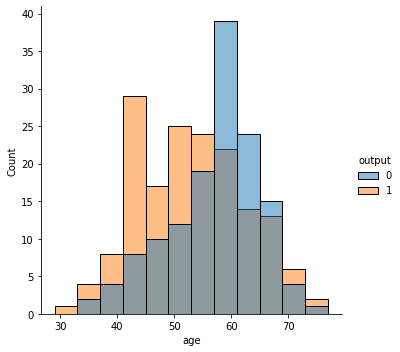

In [9]:
sns.displot(x=df['age'], hue=df['output'])

Age seems to be the most obvious indicator of heart disease. Let's see the chance of heart attack by age. Similarly's let see how other variables are impacted by age. 

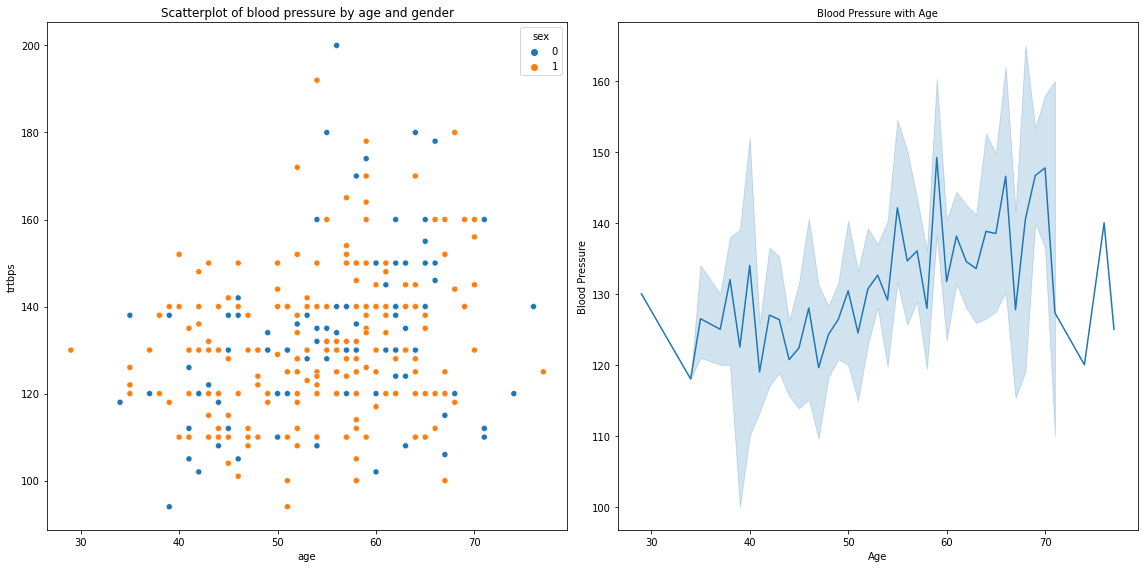

In [17]:
fig = plt.figure(figsize=(16,8))

#  subplot #1
plt.subplot(121)
plt.title('Scatterplot of blood pressure by age and gender')
sns.scatterplot(data = df, x = 'age', y = 'trtbps', hue = 'sex')

#  subplot #2
plt.subplot(122)
sns.lineplot(y="trtbps",x="age",data=df)
plt.title("Blood Pressure with Age",fontsize=10)
plt.xlabel("Age",fontsize=10)
plt.ylabel("Blood Pressure",fontsize=10)#

plt.tight_layout()
plt.show()

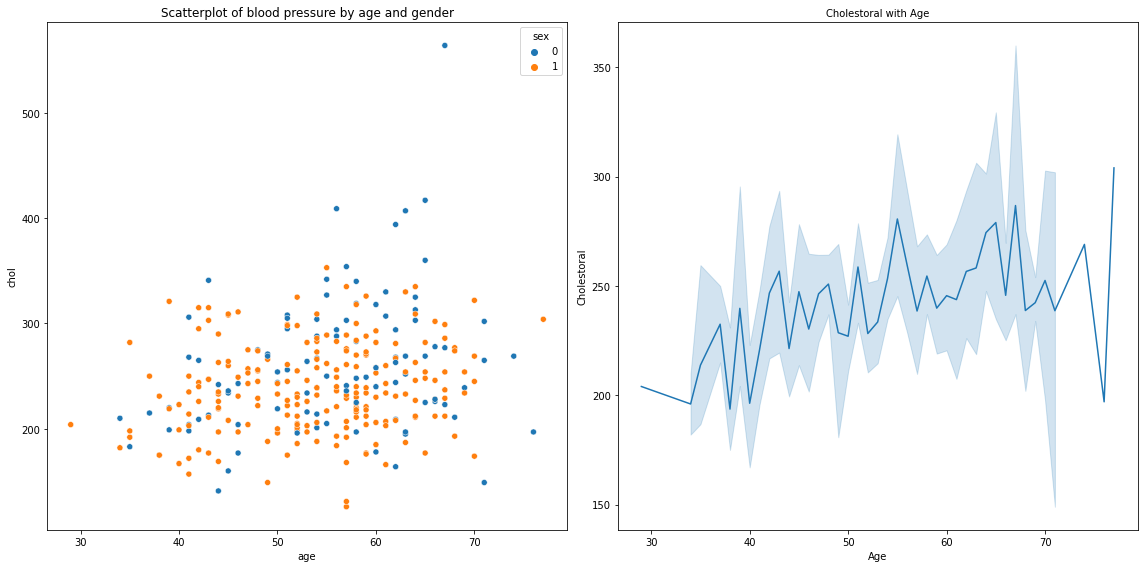

In [18]:
fig = plt.figure(figsize=(16,8))

#  subplot #1
plt.subplot(121)
plt.title('Scatterplot of cholestoral by age and gender')
sns.scatterplot(data = df, x = 'age', y = 'chol', hue = 'sex')

#  subplot #2
plt.subplot(122)
sns.lineplot(y="chol",x="age",data=df)
plt.title("Cholestoral with Age",fontsize=10)
plt.xlabel("Age",fontsize=10)
plt.ylabel("Cholestoral",fontsize=10)

plt.tight_layout()
plt.show()

We see upward trends in both cholesotral and blood pressure as a person ages. Let's see what these factors look like regarding the chances of heart disease. 

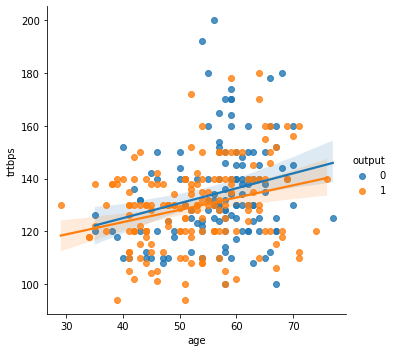

In [19]:
sns.lmplot(data= df, x='age', y='trtbps', hue='output')

In [20]:
x = df['age']
y = df['trtbps']

In [21]:
import scipy.stats
result = scipy.stats.linregress(x, y)
result.rvalue

0.27935090656128825

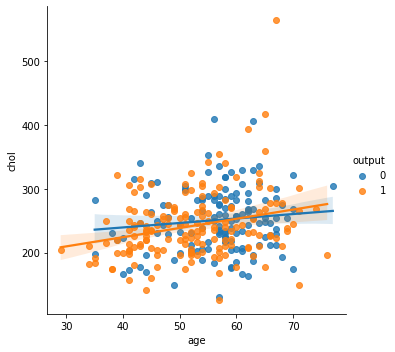

In [22]:
sns.lmplot(data= df, x='age', y='chol', hue='output')

In [23]:
y2 = df['chol']
result2 = scipy.stats.linregress(x, y2)
result2.rvalue

0.21367795655956176

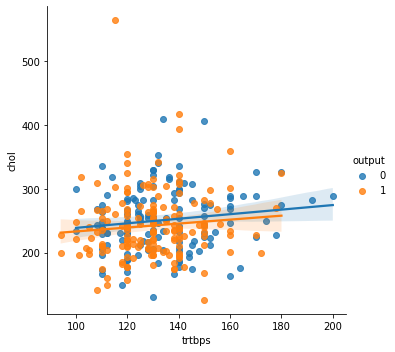

In [24]:
sns.lmplot(data= df, x='trtbps', y='chol', hue='output')

In [25]:
result3 = scipy.stats.linregress(y, y2)
result3.rvalue

0.12317420653239072

Correlation matrix to see which two variables are correlated

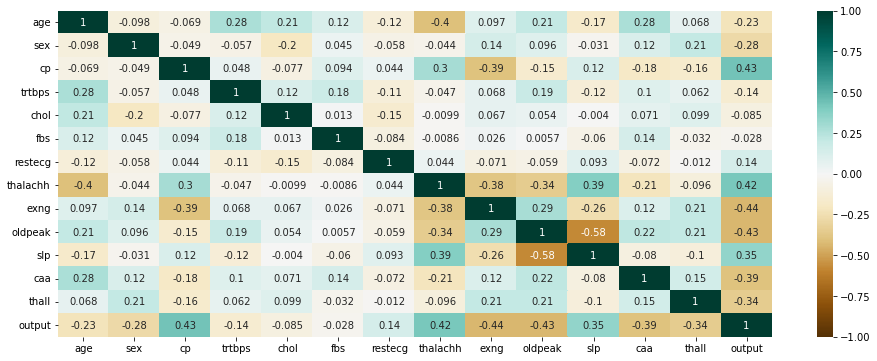

In [26]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')

There is no strong correlation between two variables to indicate they are the strongest indicators of a heart attack.